In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from homework3.fdtd_functions import fdtd_3d as fdtd3
from homework3.function_headers_fdtd import fdtd_3d

In [2]:
freq = 5e14 #500THz
tau = 1e-15  #1fs
dr = 3e-8  #30nm
T = 1e-14  #10fs

In [3]:
eps = np.ones((199,201,5))
jx = np.zeros((199,201,5))
jy = np.zeros((199,201,5))
x = np.linspace(-(199//2), 199//2, 199) * dr
y = np.linspace(-(201//2), 201//2, 201) * dr
w = 2 * dr
YY, XX = np.meshgrid(y,x)
jz = np.exp(-(XX**2+YY**2)/w**2)
jz = jz[...,np.newaxis]
jz = np.repeat(jz,5,2)

In [4]:
F, t = fdtd_3d(eps_rel=eps, dr=dr, time_span=T, freq=freq, tau=tau, jx=jx, jy=jy, jz=jz, field_component='hy', z_ind=2, output_step=4)

/Users/wujianyang/CPho/homework3/function_headers_fdtd.py:172: RuntimeWarning: overflow encountered in true_divide
  (Hx[1:Nx-1, 1:Ny-1, 0:Nz-1] - Hx[1:Nx-1, 0:Ny-2, 0:Nz-1])/dr -
/Users/wujianyang/CPho/homework3/function_headers_fdtd.py:183: RuntimeWarning: overflow encountered in subtract
  (Ez[1:Nx-1, 1:Ny, 0:Nz-1] - Ez[1:Nx-1, 0:Ny-1, 0:Nz-1])/dr)
/Users/wujianyang/CPho/homework3/function_headers_fdtd.py:183: RuntimeWarning: invalid value encountered in subtract
  (Ez[1:Nx-1, 1:Ny, 0:Nz-1] - Ez[1:Nx-1, 0:Ny-1, 0:Nz-1])/dr)
/Users/wujianyang/CPho/homework3/function_headers_fdtd.py:183: RuntimeWarning: overflow encountered in true_divide
  (Ez[1:Nx-1, 1:Ny, 0:Nz-1] - Ez[1:Nx-1, 0:Ny-1, 0:Nz-1])/dr)
/Users/wujianyang/CPho/homework3/function_headers_fdtd.py:183: RuntimeWarning: invalid value encountered in true_divide
  (Ez[1:Nx-1, 1:Ny, 0:Nz-1] - Ez[1:Nx-1, 0:Ny-1, 0:Nz-1])/dr)
/Users/wujianyang/CPho/homework3/function_headers_fdtd.py:184: RuntimeWarning: invalid value encountered in 

In [4]:
c = 2.99792458e8
mu0 = 4 * np.pi * 1e-7
eps0 = 1 / (mu0 * c ** 2)

dt = dr / (2*c)
Niter = int(T//dt)
t = np.arange(0, T, dt*4)
Nt = len(t)

Nx, Ny, Nz = eps.shape
Ex = np.zeros((Nx-1, Ny, Nz)).astype('complex')
Ey = np.zeros((Nx, Ny-1, Nz)).astype('complex')
Ez = np.zeros((Nx, Ny, Nz-1)).astype('complex')
Hx = np.zeros((Nx, Ny-1, Nz-1)).astype('complex')
Hy = np.zeros((Nx-1, Ny, Nz-1)).astype('complex')
Hz = np.zeros((Nx-1, Ny-1, Nz)).astype('complex')

epsx_rec = (1/eps[:-1, :, :] + 1/eps[1:, :, :])/2
epsx_rec = epsx_rec[0:Nx-1, 1:Ny-1, 1:Nz-1]
epsy_rec = (1/eps[:, :-1, :] + 1/eps[:, 1:, :])/2
epsy_rec = epsy_rec[1:Nx-1, 0:Ny-1, 1:Nz-1]
epsz_rec = (1/eps[:, :, :-1] + 1/eps[:, :, 1:])/2
epsz_rec = epsz_rec[1:Nx-1, 1:Ny-1, 0:Nz-1]

jx = (jx[:-1, :, :] + jx[1:, :, :])/2
jy = (jy[:, :-1, :] + jy[:, 1:, :])/2
jz = (jz[:, :, :-1] + jz[:, :, 1:])/2

In [ ]:
for n in range(50):
    t_source = dt*(n + 1/2) - 3*tau
    jx_n = jx * np.exp(-2j * np.pi * freq * t_source) * np.exp(-(t_source/tau)**2)
    jy_n = jy * np.exp(-2j * np.pi * freq * t_source) * np.exp(-(t_source/tau)**2)
    jz_n = jz * np.exp(-2j * np.pi * freq * t_source) * np.exp(-(t_source/tau)**2)

    Ex[0:Nx-1, 1:Ny-1, 1:Nz-1] += (dt/(eps0*epsx_rec) *
                                   ((Hz[0:Nx-1, 1:Ny-1, 1:Nz-1] - Hz[0:Nx-1, 0:Ny-2, 1:Nz-1])/dr -
                                    (Hy[0:Nx-1, 1:Ny-1, 1:Nz-1] - Hy[0:Nx-1, 1:Ny-1, 0:Nz-2])/dr -
                                    jx_n[0:Nx-1, 1:Ny-1, 1:Nz-1]))
    Ey[1:Nx-1, 0:Ny-1, 1:Nz-1] += (dt/(eps0*epsy_rec) *
                                   (Hx[1:Nx-1, 0:Ny-1, 1:Nz-1] - Hx[1:Nx-1, 0:Ny-1, 0:Nz-2])/dr -
                                   (Hz[1:Nx-1, 0:Ny-1, 1:Nz-1] - Hz[0:Nx-2, 0:Ny-1, 1:Nz-1])/dr -
                                   jy_n[1:Nx-1, 0:Ny-1, 1:Nz-1])
    Ez[1:Nx-1, 1:Ny-1, 0:Nz-1] += (dt/(eps0 * epsz_rec) *
                                   (Hy[1:Nx-1, 1:Ny-1, 0:Nz-1] - Hy[0:Nx-2, 1:Ny-1, 0:Nz-1])/dr -
                                   (Hx[1:Nx-1, 1:Ny-1, 0:Nz-1] - Hx[1:Nx-1, 0:Ny-2, 0:Nz-1])/dr -
                                   jz_n[1:Nx-1, 1:Ny-1, 0:Nz-1])
    Hx[1:Nx-1, 0:Ny-1, 0:Nz-1] += (dt/mu0 * (Ey[1:Nx-1, 0:Ny-1, 1:Nz] - Ey[1:Nx-1, 0:Ny-1, 0:Nz-1])/dr -
                                   (Ez[1:Nx-1, 1:Ny, 0:Nz-1] - Ez[1:Nx-1, 0:Ny-1, 0:Nz-1])/dr)
    Hy[0:Nx-1, 1:Ny-1, 0:Nz-1] += (dt/mu0 * (Ez[1:Nx, 1:Ny-1, 0:Nz-1] - Ez[0:Nx-1, 1:Ny-1, 0:Nz-1])/dr -
                                   (Ex[0:Nx-1, 1:Ny-1, 1:Nz] - Ex[0:Nx-1, 1:Ny-1, 0:Nz-1])/dr)
    Hz[0:Nx-1, 0:Ny-1, 1:Nz-1] += (dt/mu0 * (Ex[0:Nx-1, 1:Ny, 1:Nz-1] - Ex[0:Nx-1, 0:Ny-1, 1:Nz-1])/dr -
                                   (Ey[1:Nx, 0:Ny-1, 1:Nz-1] - Ey[0:Nx-1, 0:Ny-1, 1:Nz-1])/dr)

/var/folders/dq/0b06_dss4971r54wyrbp_63r0000gn/T/ipykernel_3426/2827630888.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


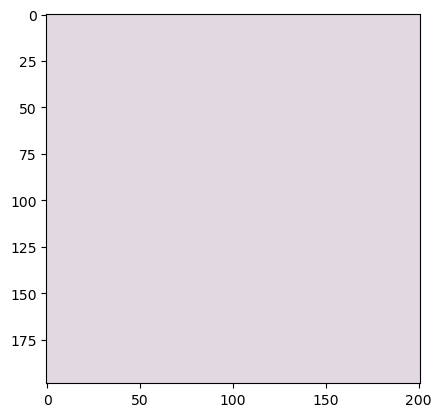

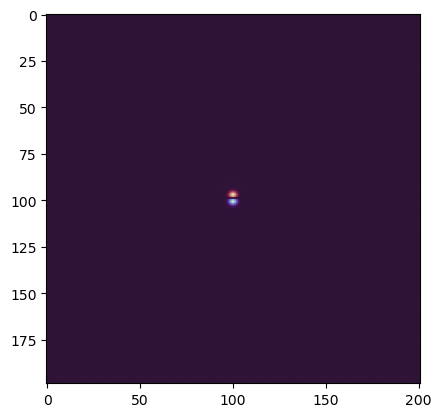

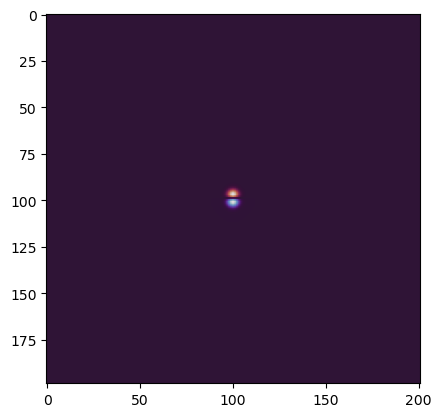

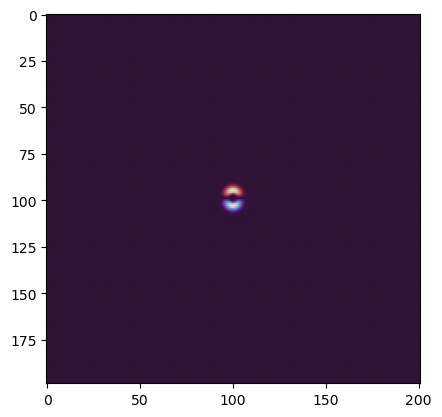

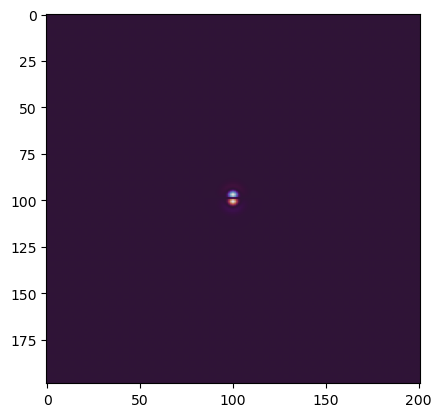

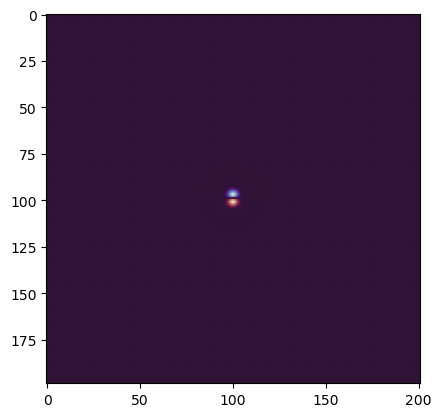

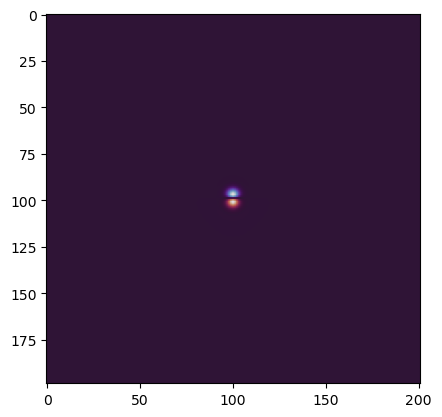

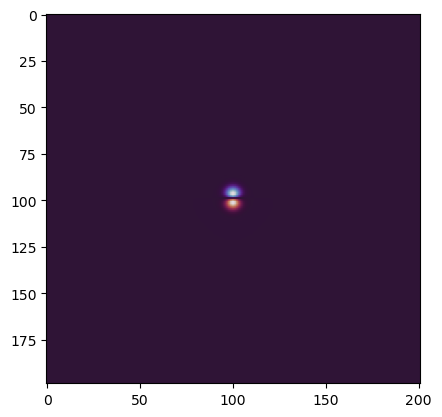

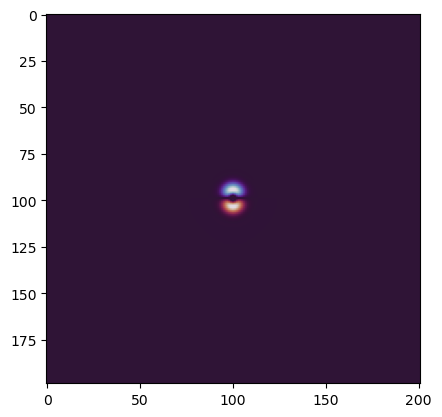

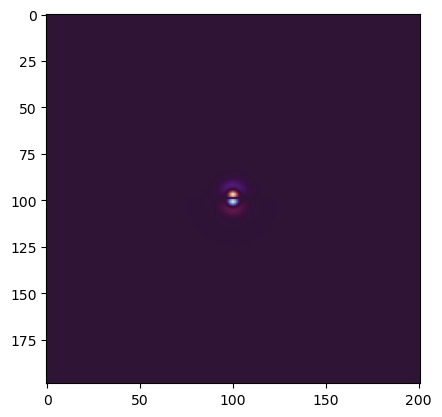

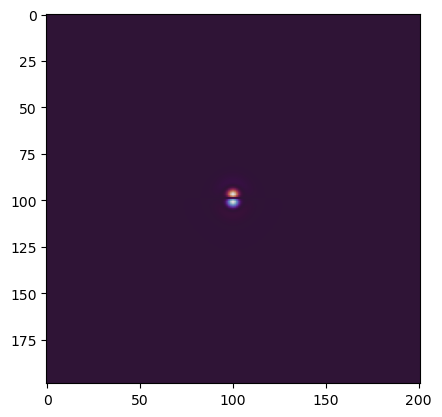

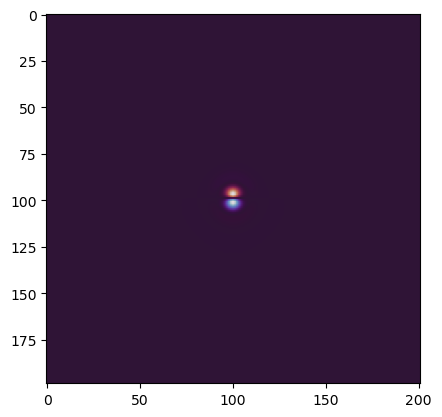

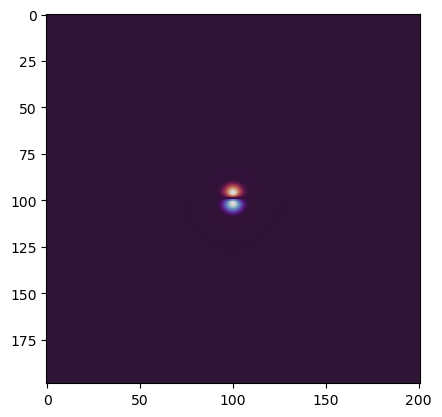

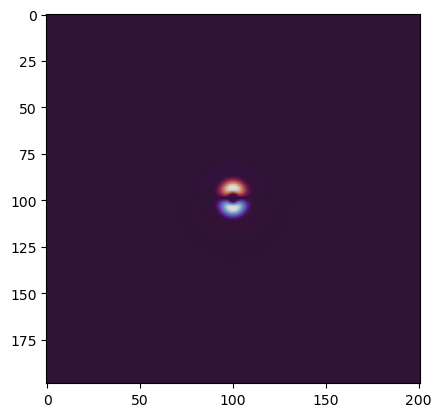

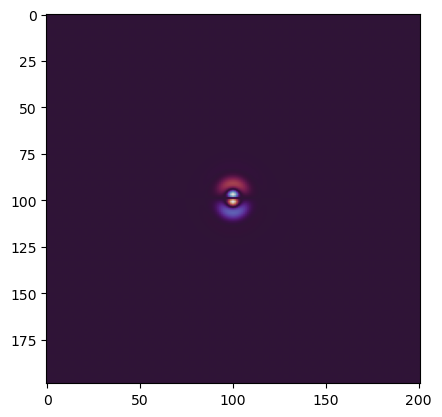

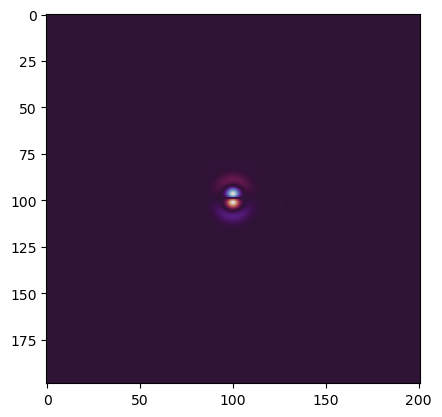

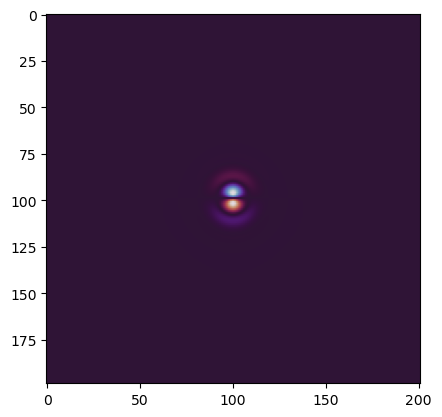

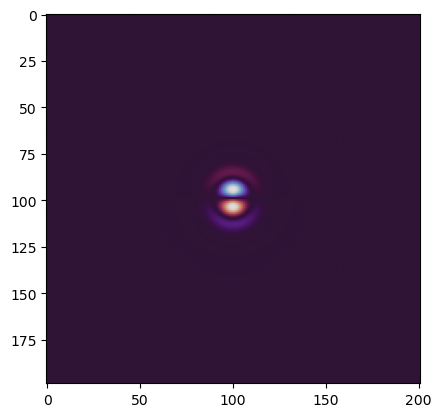

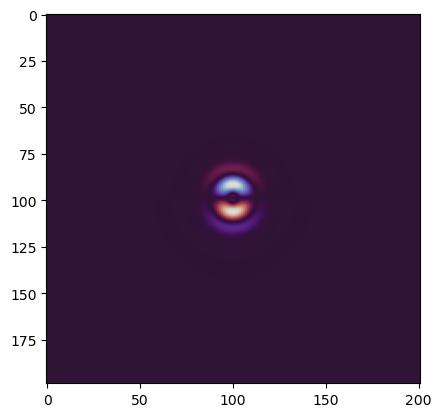

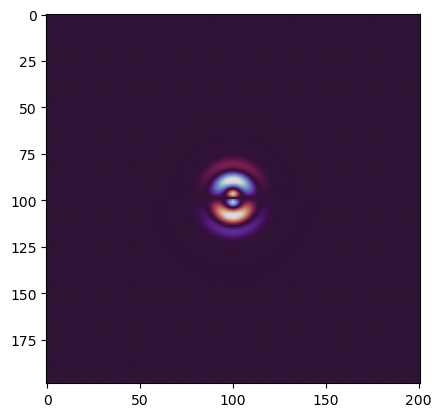

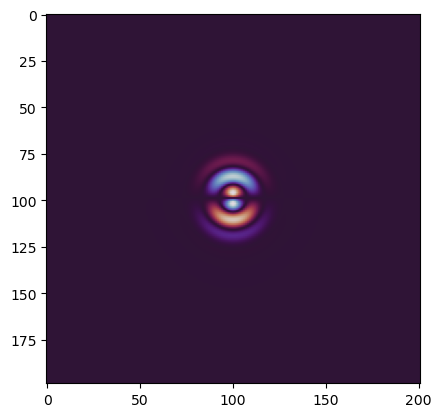

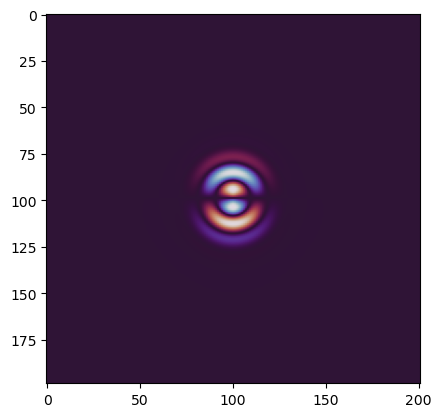

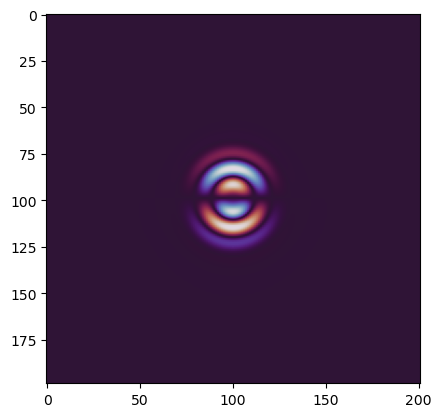

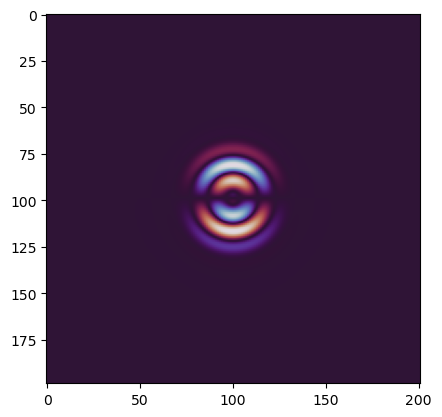

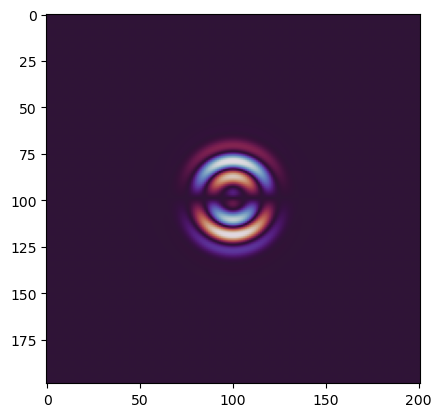

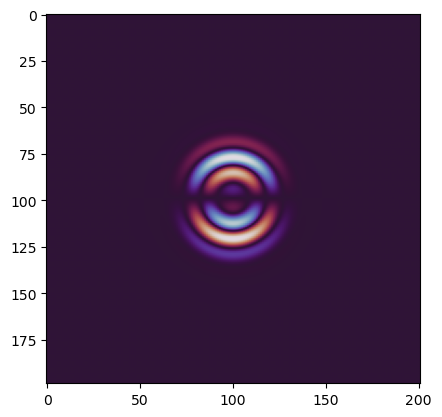

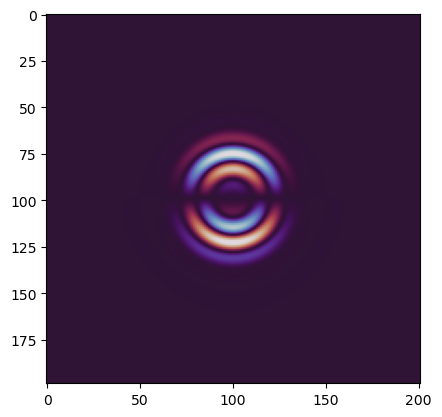

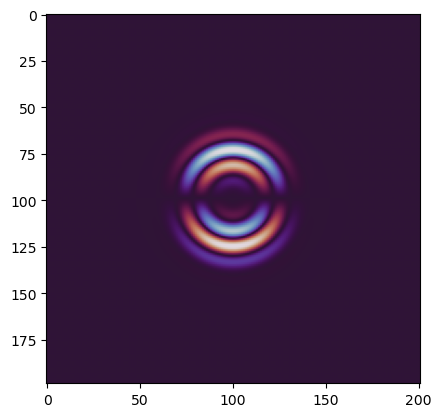

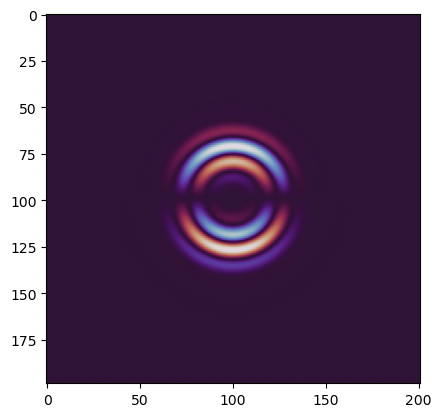

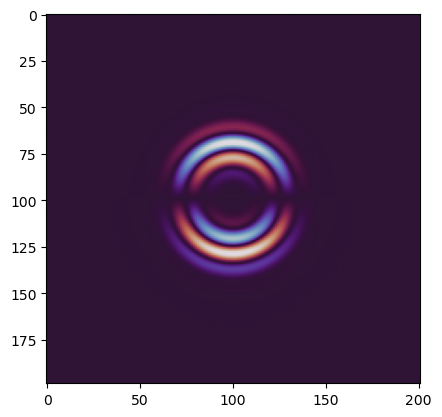

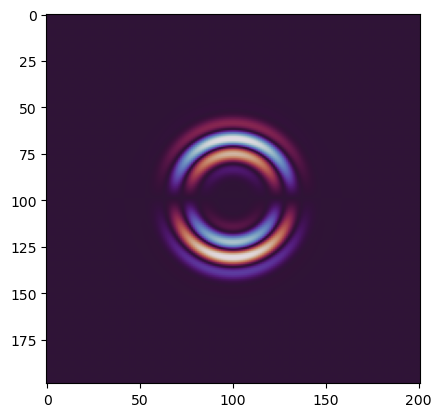

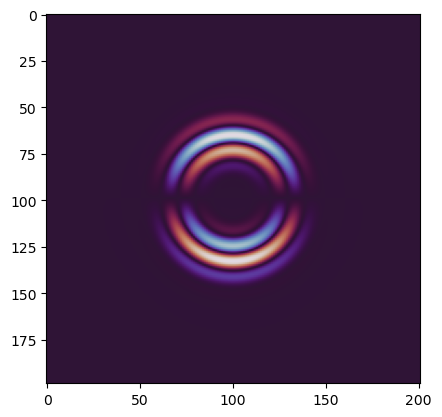

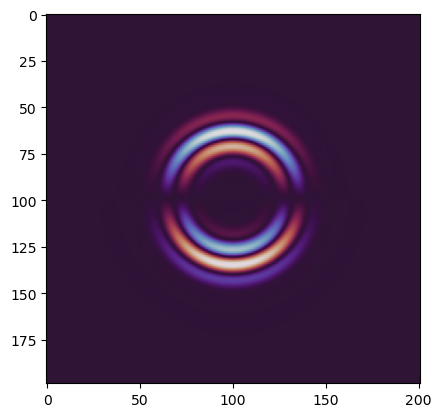

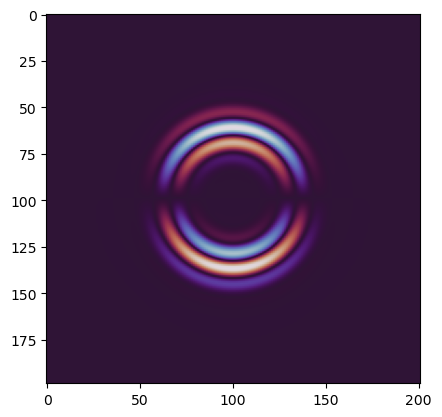

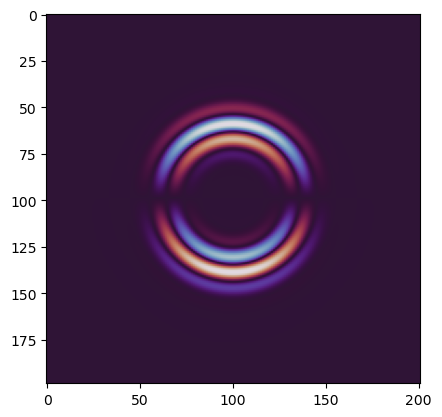

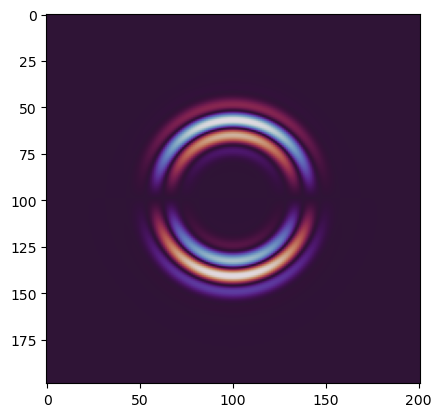

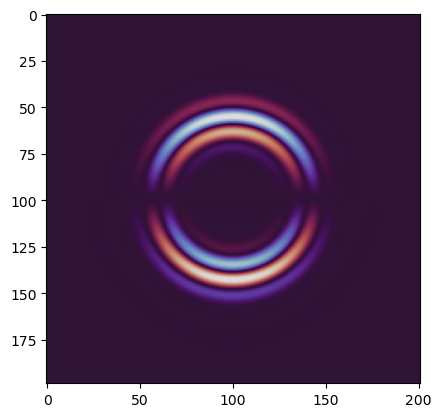

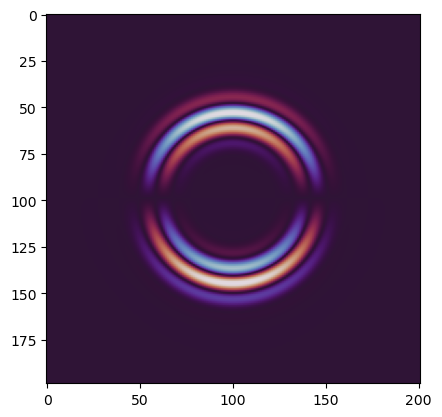

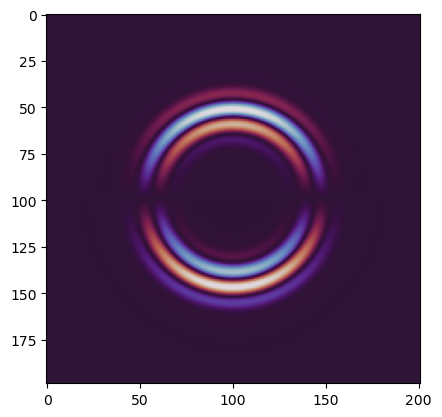

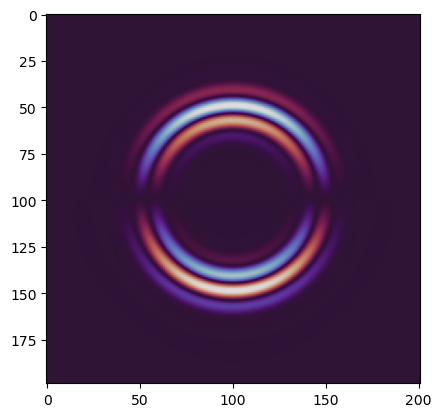

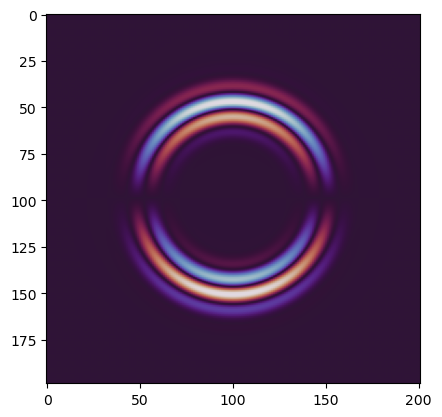

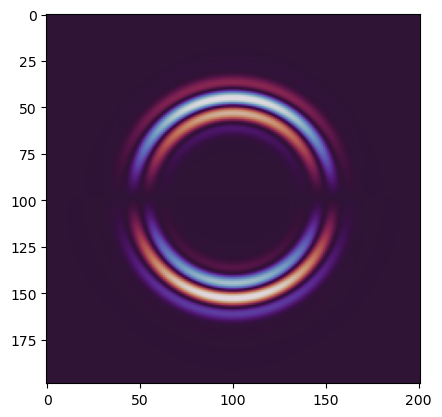

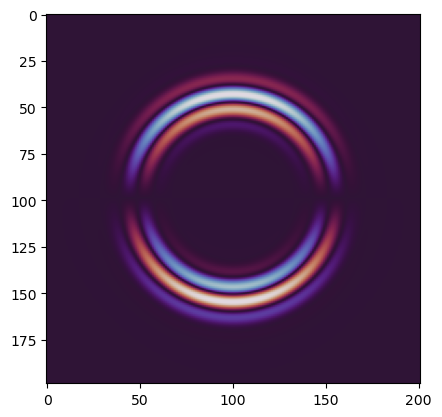

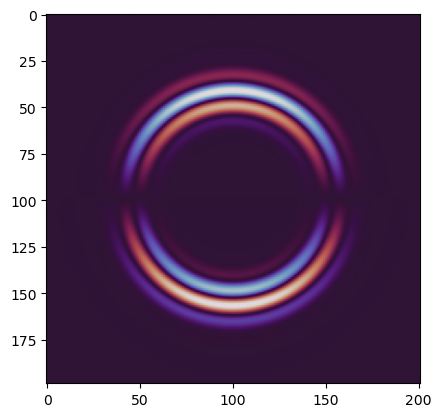

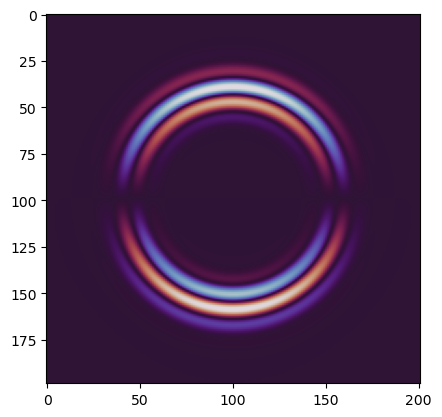

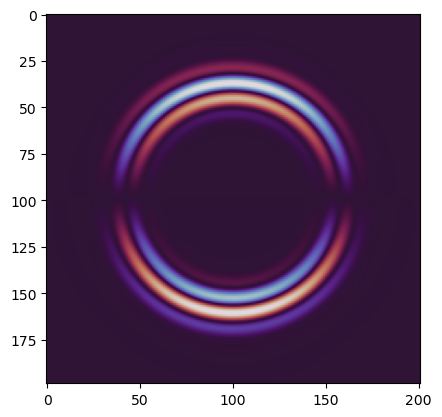

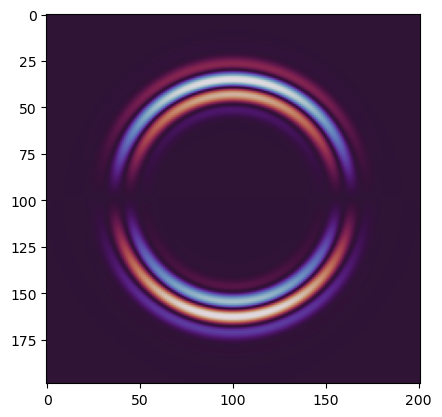

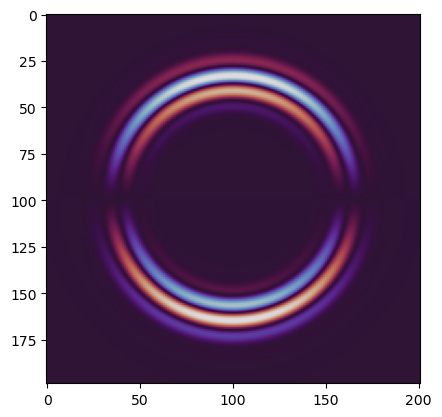

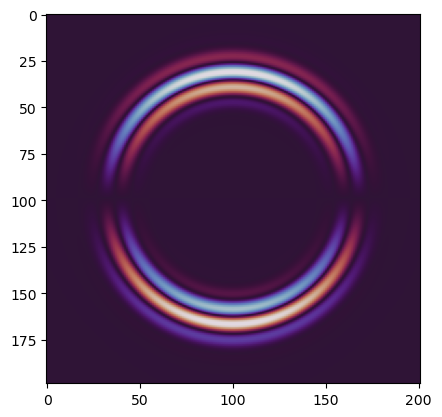

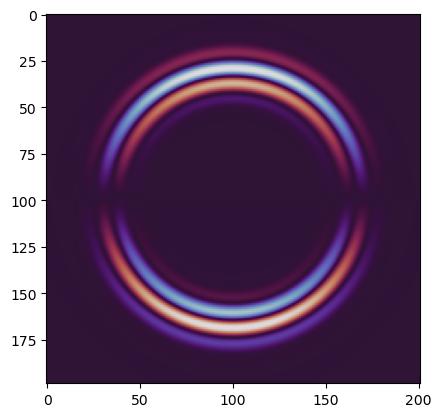

In [11]:
for i in range(0,50):
    plt.figure()
    plt.imshow(F[i,...].real,cmap='twilight')

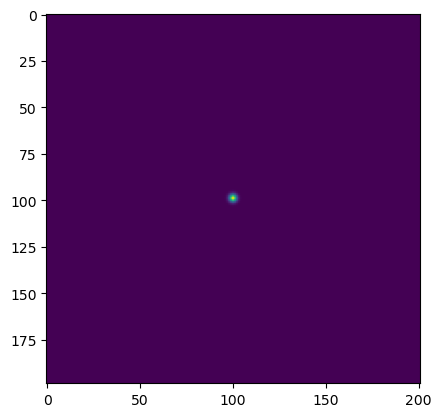

In [12]:
plt.imshow(jz[...,2].real)